# EDA for NSL_KDD 
## Features Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# data extraction 
file_path_train = 'data/nsl/KDDTrain+.txt'
file_path_test = 'data/nsl/KDDTest+.txt'
df = pd.read_csv(file_path_train, header=None)
test_df = pd.read_csv(file_path_test, header=None)

# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns
df.info()
print("-------------------------------------------------------")
print("last two columns are labels, first 41 are features")
print(f"\nNumber of features is 41")
print("-------------------------------------------------------")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


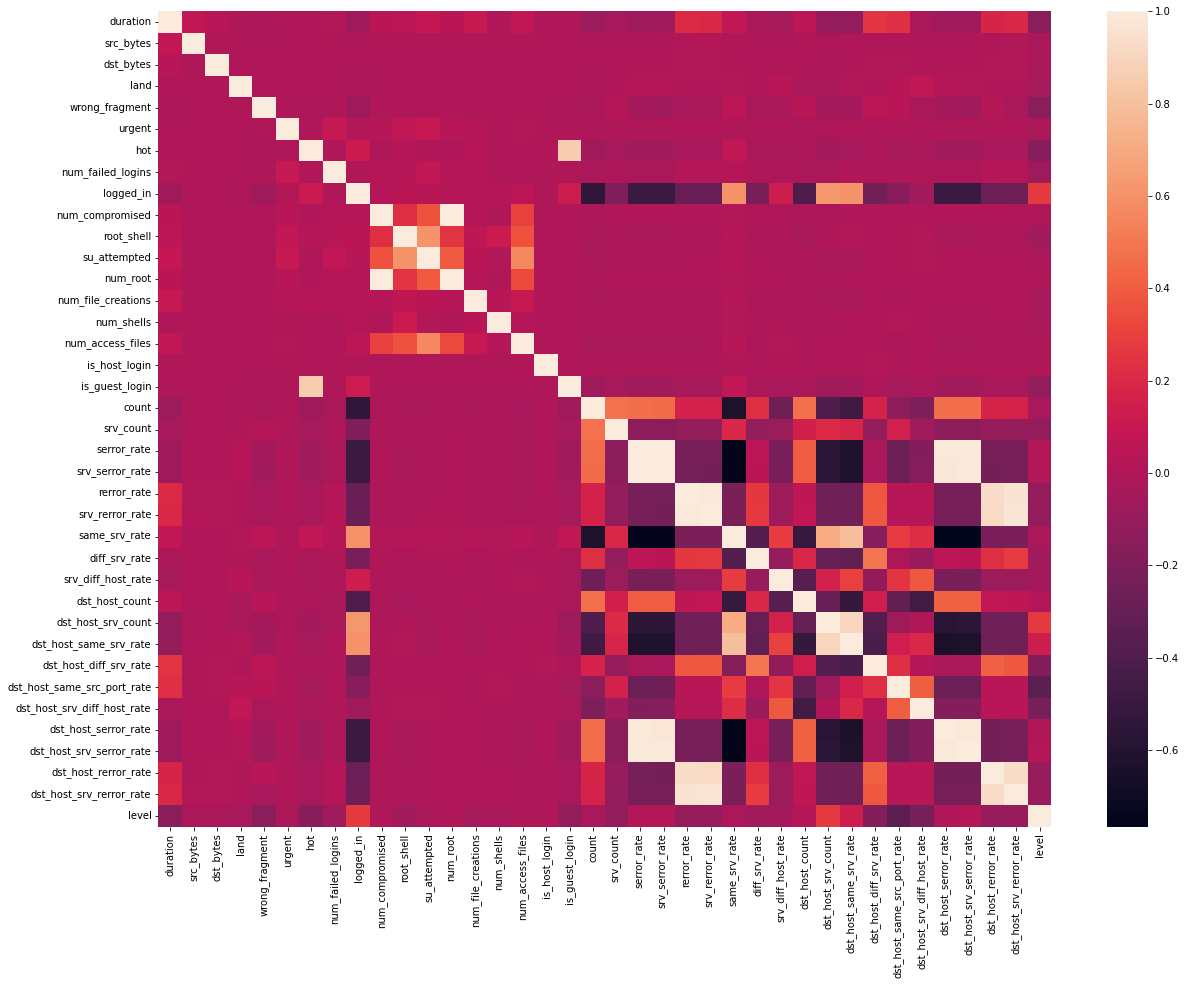

In [6]:
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
plt.figure()
sns.heatmap(corr)
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

### the above correlation graph can give me some insights on feature engineering: drop some highly correlative features for example.

In [7]:
#the standart deviation of each columns
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                  2.817483e-03
land                           1.408607e-02
urgent                         1.436603e-02
num_shells                     2.218113e-02
root_shell                     3.660284e-02
su_attempted                   4.515438e-02
num_failed_logins              4.523914e-02
is_guest_login                 9.661233e-02
num_access_files               9.936956e-02
dst_host_srv_diff_host_rate    1.125638e-01
diff_srv_rate                  1.803144e-01
dst_host_diff_srv_rate         1.889218e-01
wrong_fragment                 2.535300e-01
srv_diff_host_rate             2.598305e-01
dst_host_rerror_rate           3.065575e-01
dst_host_same_src_port_rate    3.089971e-01
dst_host_srv_rerror_rate       3.194594e-01
rerror_rate                    3.204355e-01
srv_rerror_rate                3.236472e-01
same_srv_rate                  4.396229e-01
dst_host_serror_rate           4.447841e-01
dst_host_srv_serror_rate       4.456691e-01
serror_rate                    4

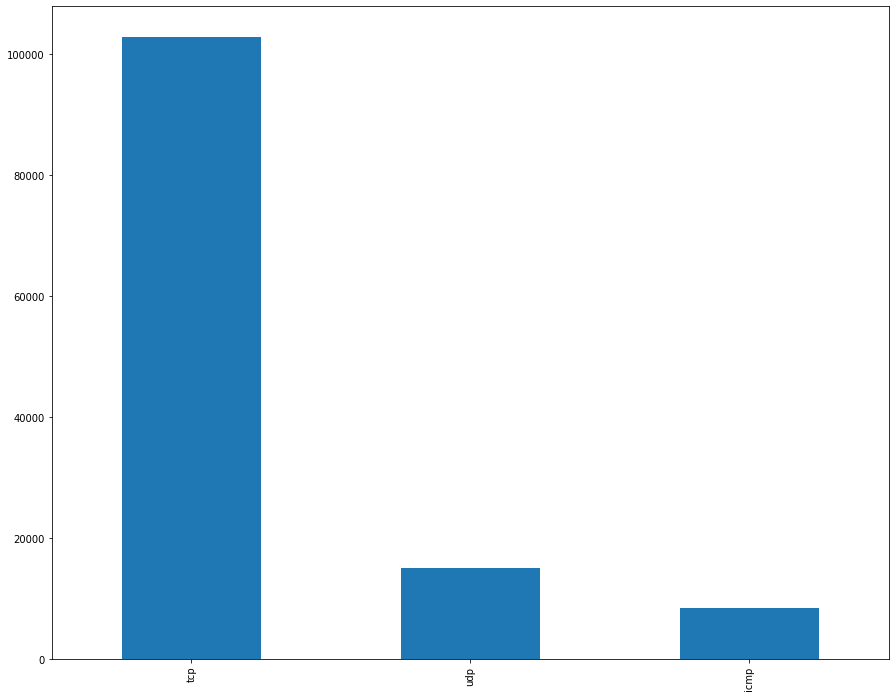

In [11]:
# categorical features distribution
def bar_graph(feature):
    df[feature].value_counts().plot(kind='bar')
bar_graph('protocol_type')

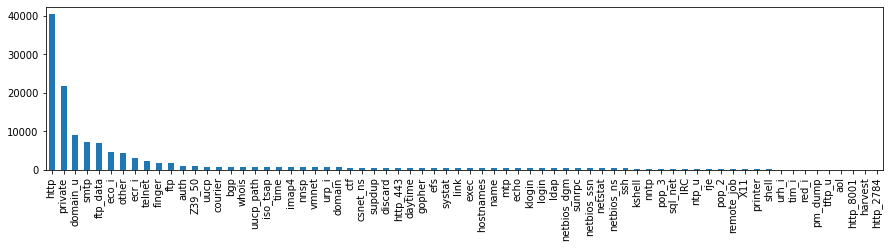

In [12]:
plt.figure(figsize=(15,3))
bar_graph('service')

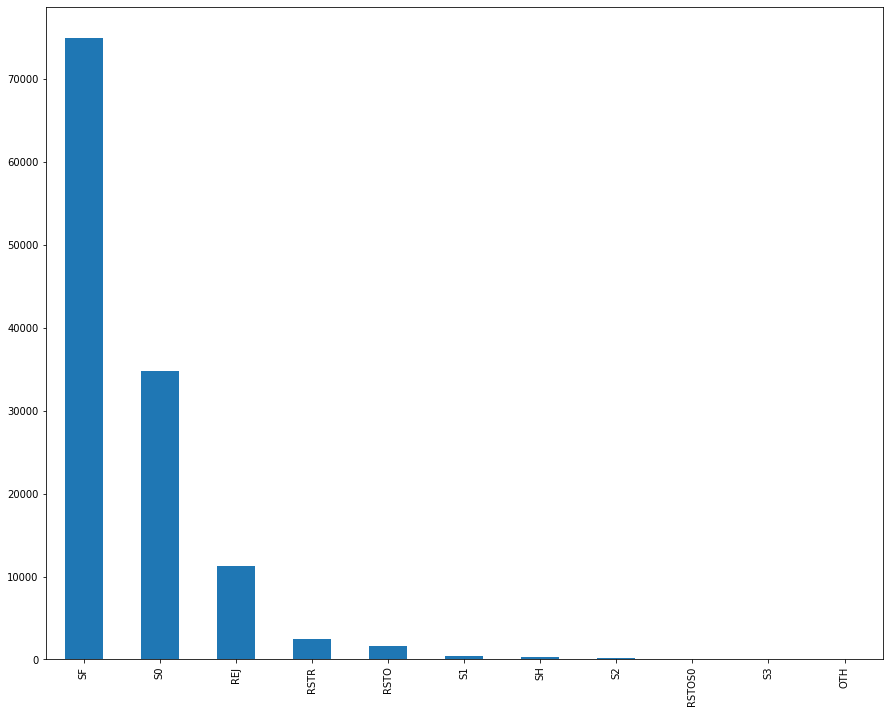

In [13]:
bar_graph('flag')





## Train Dataset Analysis

In [14]:

# train dataset exploration
total = len(df)
print("\nThere are {} total datapoints in trainset".format(total))
attack_type = set(df["attack"])
print("\nAttack types(labels) in trainset are \n{}".format(attack_type))
print("\nNumbs of attack types in trainset are {}".format(len(attack_type)))


There are 125973 total datapoints in trainset

Attack types(labels) in trainset are 
{'ftp_write', 'warezmaster', 'pod', 'land', 'teardrop', 'portsweep', 'guess_passwd', 'imap', 'normal', 'nmap', 'neptune', 'satan', 'buffer_overflow', 'spy', 'phf', 'loadmodule', 'perl', 'warezclient', 'back', 'smurf', 'rootkit', 'ipsweep', 'multihop'}

Numbs of attack types in trainset are 23


attack types distribution in whole dataset
attack type           Amount           Percentage

      ftp_write          8          0.00635%

    warezmaster          20          0.01588%

            pod          201          0.15956%

           land          18          0.01429%

       teardrop          892          0.70809%

      portsweep          2931          2.32669%

   guess_passwd          53          0.04207%

           imap          11          0.00873%

         normal          67343          53.45828%

           nmap          1493          1.18517%

        neptune          41214          32.71653%

          satan          3633          2.88395%

buffer_overflow          30          0.02381%

            spy          2          0.00159%

            phf          4          0.00318%

     loadmodule          9          0.00714%

           perl          3          0.00238%

    warezclient          890          0.70650%

           back          956          0.75889%



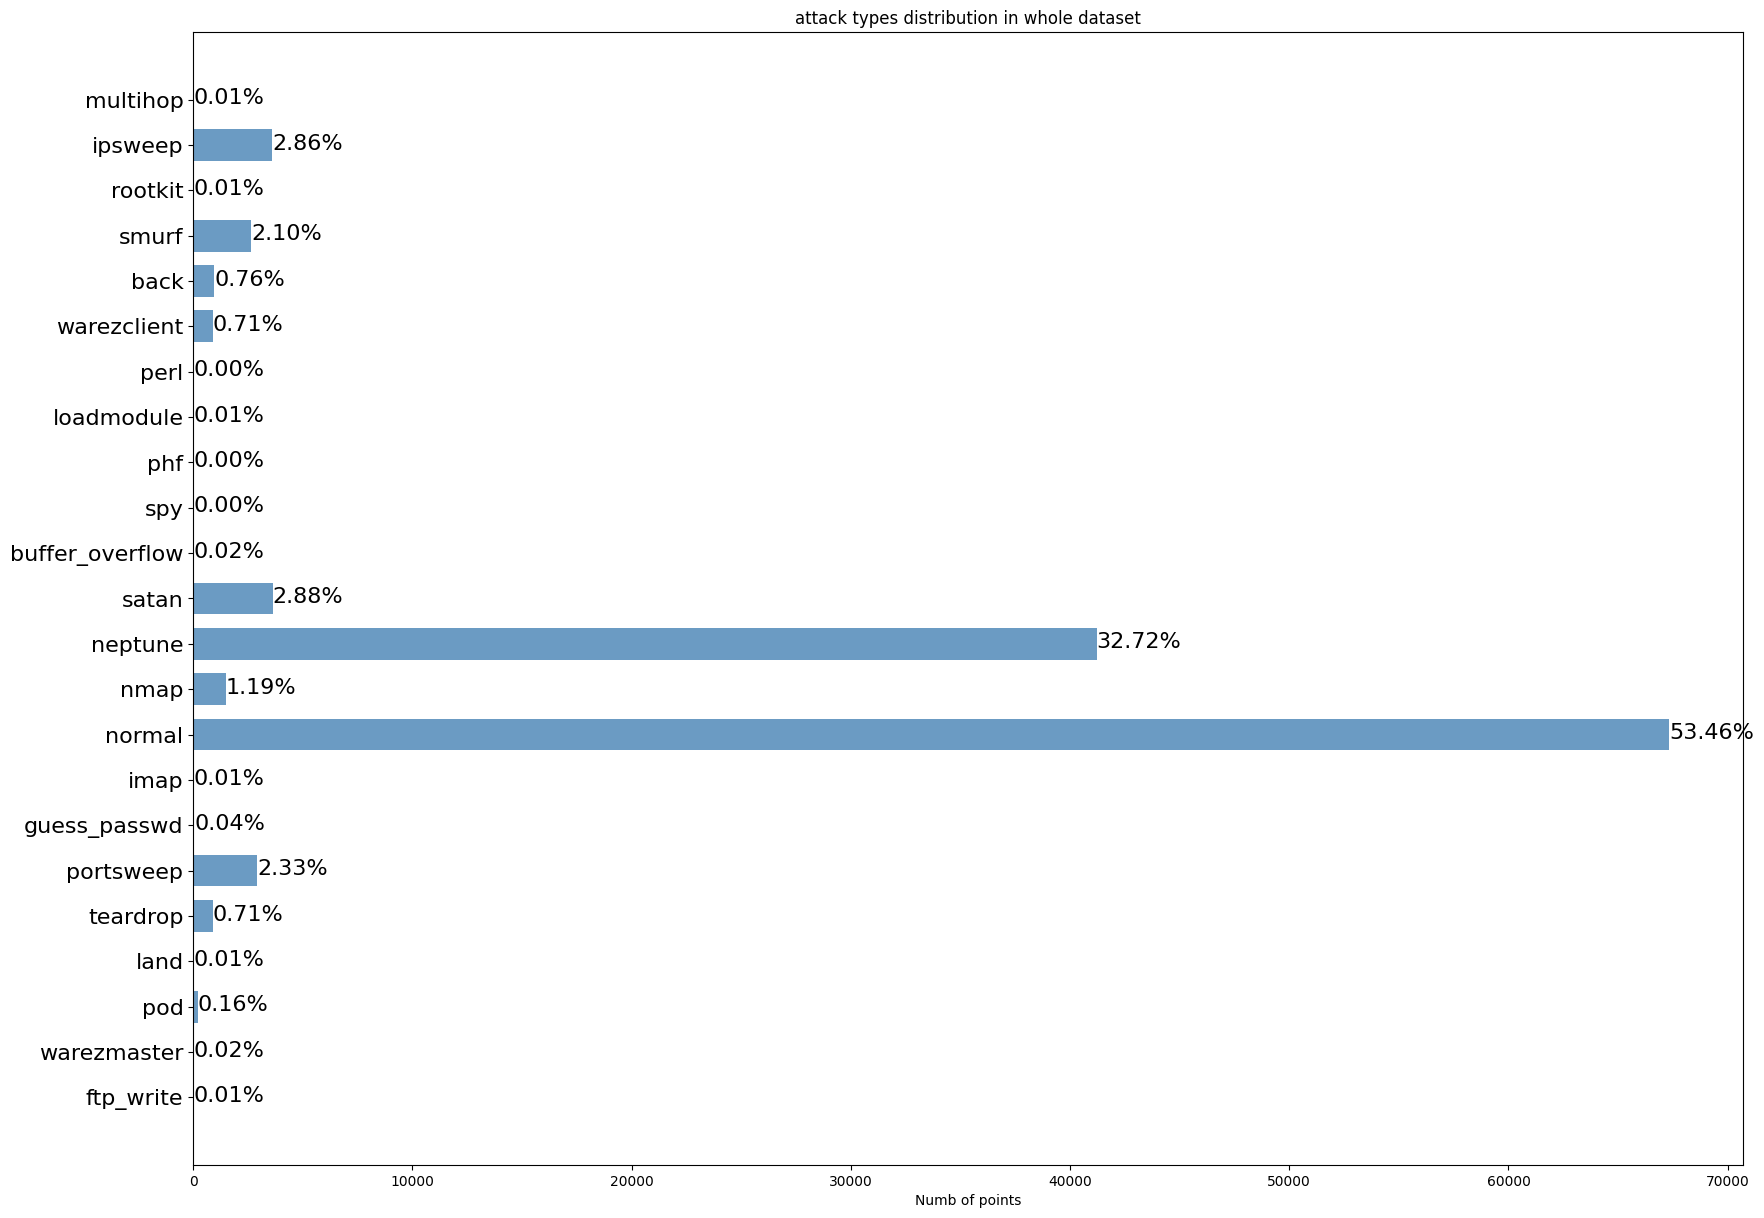

In [15]:
print("attack types distribution in whole dataset")
num = []
percent = []
for idx, attack in enumerate(attack_type):
    attack_num = len(df[df["attack"] == attack])
    num.append(attack_num)
    percent.append(attack_num/total)
print("attack type           Amount           Percentage")
for idx, attack in enumerate(attack_type):
    print("\n{:>15}          {}          {:.5%}".format(attack,num[idx],percent[idx]))

plt.barh(range(len(attack_type)), num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(attack_type)), attack_type, fontsize=16)
plt.xlabel("Numb of points")
plt.title("attack types distribution in whole dataset")
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100
for x, y in enumerate(num):
    plt.text(y+0.2, x-0.1, "{:.2%}".format(percent[x]), fontsize=16)
plt.show()

attack types distribution in attack dataset only

Total abnormal points are 58630
attack type           Amount           Percentage

      ftp_write          8          0.01364%

    warezmaster          20          0.03411%

            pod          201          0.34283%

           land          18          0.03070%

       teardrop          892          1.52141%

      portsweep          2931          4.99915%

   guess_passwd          53          0.09040%

           imap          11          0.01876%

           nmap          1493          2.54648%

        neptune          41214          70.29507%

          satan          3633          6.19649%

buffer_overflow          30          0.05117%

            spy          2          0.00341%

            phf          4          0.00682%

     loadmodule          9          0.01535%

           perl          3          0.00512%

    warezclient          890          1.51799%

           back          956          1.63056%

          sm

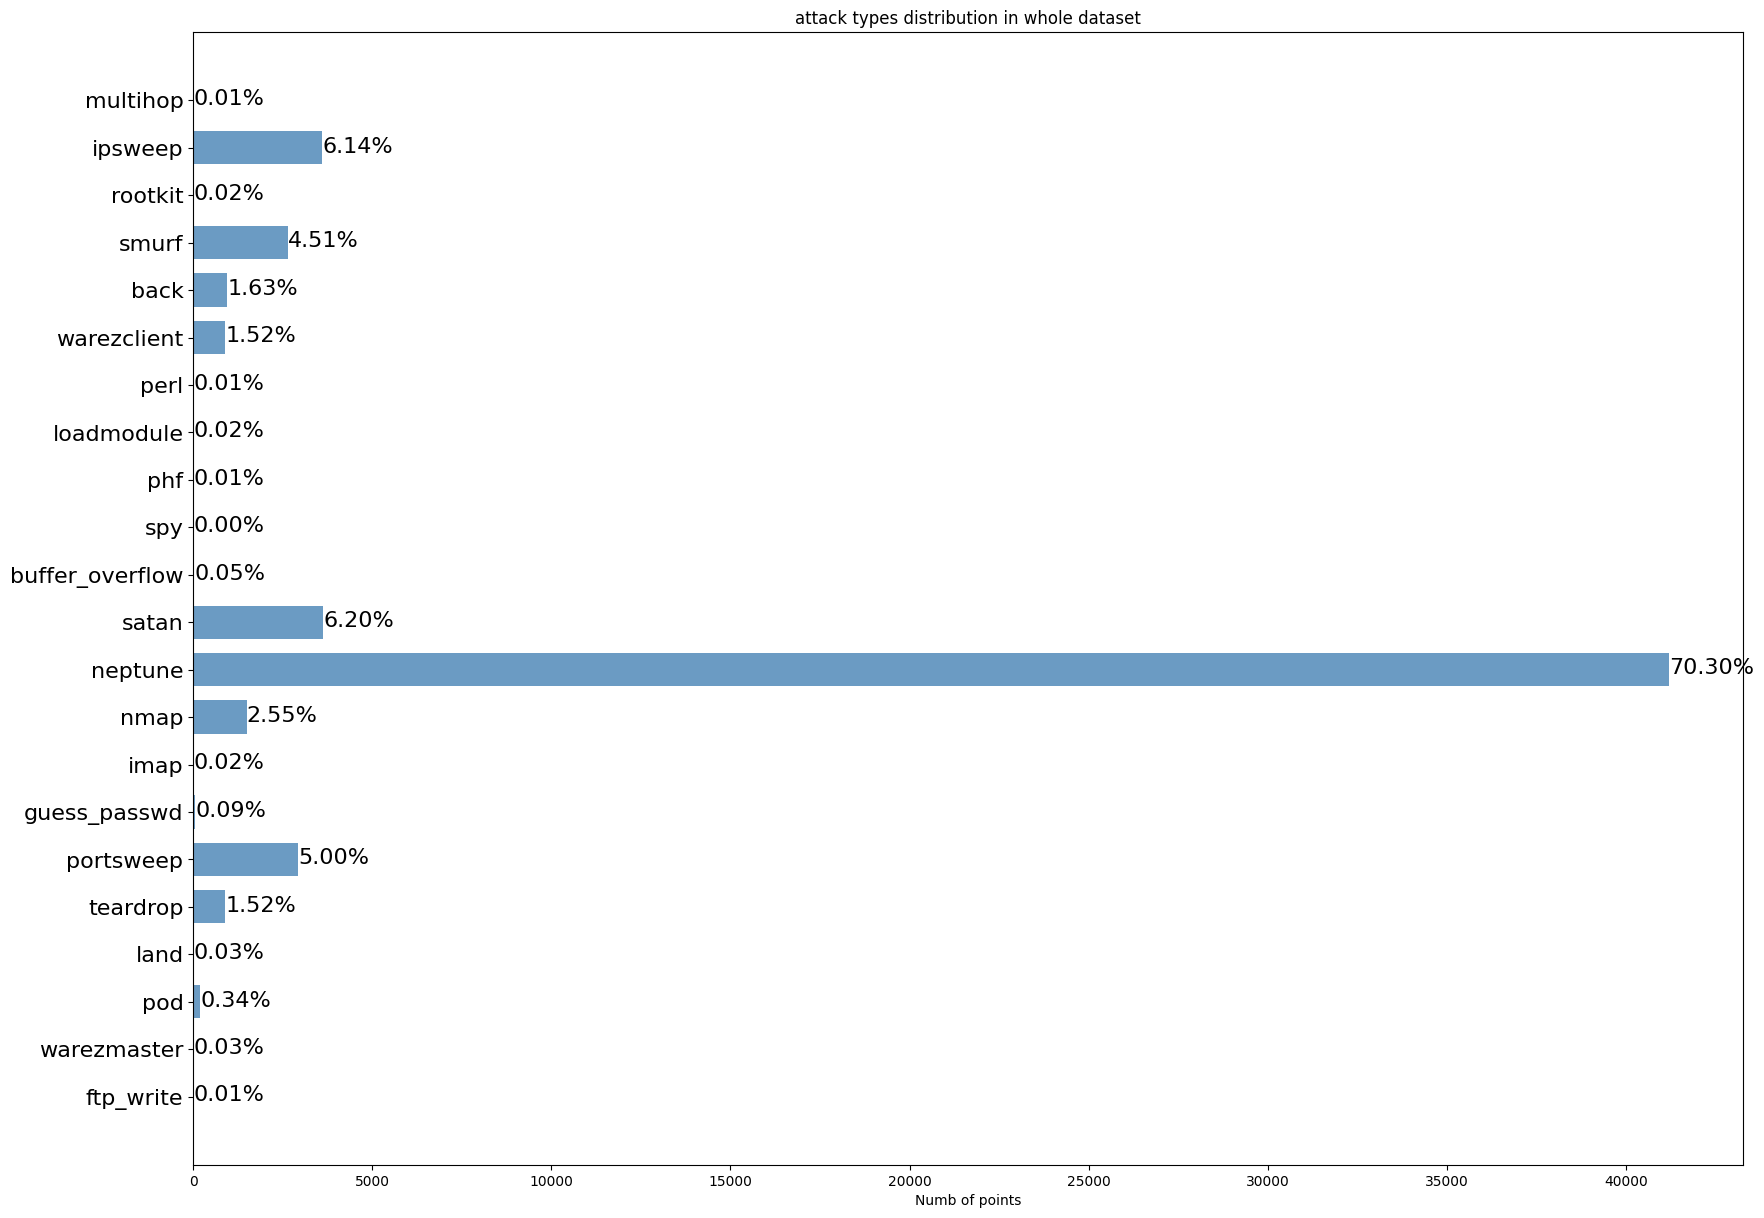

In [16]:
print("attack types distribution in attack dataset only")
num = []
percent = []
total = len(df) - len(df[df["attack"] == "normal"])
if 'normal' in attack_type:
    attack_type.remove('normal')
print("\nTotal abnormal points are {}".format(total))
for idx, attack in enumerate(attack_type):
    attack_num = len(df[df["attack"] == attack])
    num.append(attack_num)
    percent.append(attack_num/total)
print("attack type           Amount           Percentage")
for idx, attack in enumerate(attack_type):
    print("\n{:>15}          {}          {:.5%}".format(attack,num[idx],percent[idx]))
    
plt.barh(range(len(attack_type)), num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(attack_type)), attack_type, fontsize=16)
plt.xlabel("Numb of points")
plt.title("attack types distribution in whole dataset")
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100
for x, y in enumerate(num):
    plt.text(y+0.2, x-0.1, "{:.2%}".format(percent[x]), fontsize=16)
plt.show()

## Test Dataset Analysis

In [17]:


# test dataset exploration
total = len(test_df)
print("\nThere are {} total datapoints in testset".format(total))
attack_type = set(test_df["attack"])
print("\nAttack types(labels) in testset are \n{}".format(attack_type))
print("\nNumbs of attack types in testset are {}".format(len(attack_type)))


There are 22544 total datapoints in testset

Attack types(labels) in testset are 
{'warezmaster', 'ftp_write', 'pod', 'processtable', 'land', 'mailbomb', 'named', 'teardrop', 'portsweep', 'guess_passwd', 'imap', 'normal', 'nmap', 'neptune', 'satan', 'ipsweep', 'buffer_overflow', 'saint', 'xterm', 'phf', 'httptunnel', 'loadmodule', 'mscan', 'ps', 'sqlattack', 'perl', 'xsnoop', 'xlock', 'apache2', 'sendmail', 'worm', 'back', 'smurf', 'rootkit', 'snmpguess', 'snmpgetattack', 'udpstorm', 'multihop'}

Numbs of attack types in testset are 38


In [19]:
print("attack types distribution in whole dataset")
num = []
percent = []
for idx, attack in enumerate(attack_type):
    attack_num = len(test_df[test_df["attack"] == attack])
    num.append(attack_num)
    percent.append(attack_num/total)
print("attack type           Amount           Percentage")
for idx, attack in enumerate(attack_type):
    print("\n{:>15}          {}          {:.5%}".format(attack,num[idx],percent[idx]))


attack types distribution in whole dataset
attack type           Amount           Percentage

    warezmaster          944          4.18737%

      ftp_write          3          0.01331%

            pod          41          0.18187%

   processtable          685          3.03850%

           land          7          0.03105%

       mailbomb          293          1.29968%

          named          17          0.07541%

       teardrop          12          0.05323%

      portsweep          157          0.69642%

   guess_passwd          1231          5.46043%

           imap          1          0.00444%

         normal          9711          43.07576%

           nmap          73          0.32381%

        neptune          4657          20.65738%

          satan          735          3.26029%

        ipsweep          141          0.62544%

buffer_overflow          20          0.08872%

          saint          319          1.41501%

          xterm          13          0.05767%

 

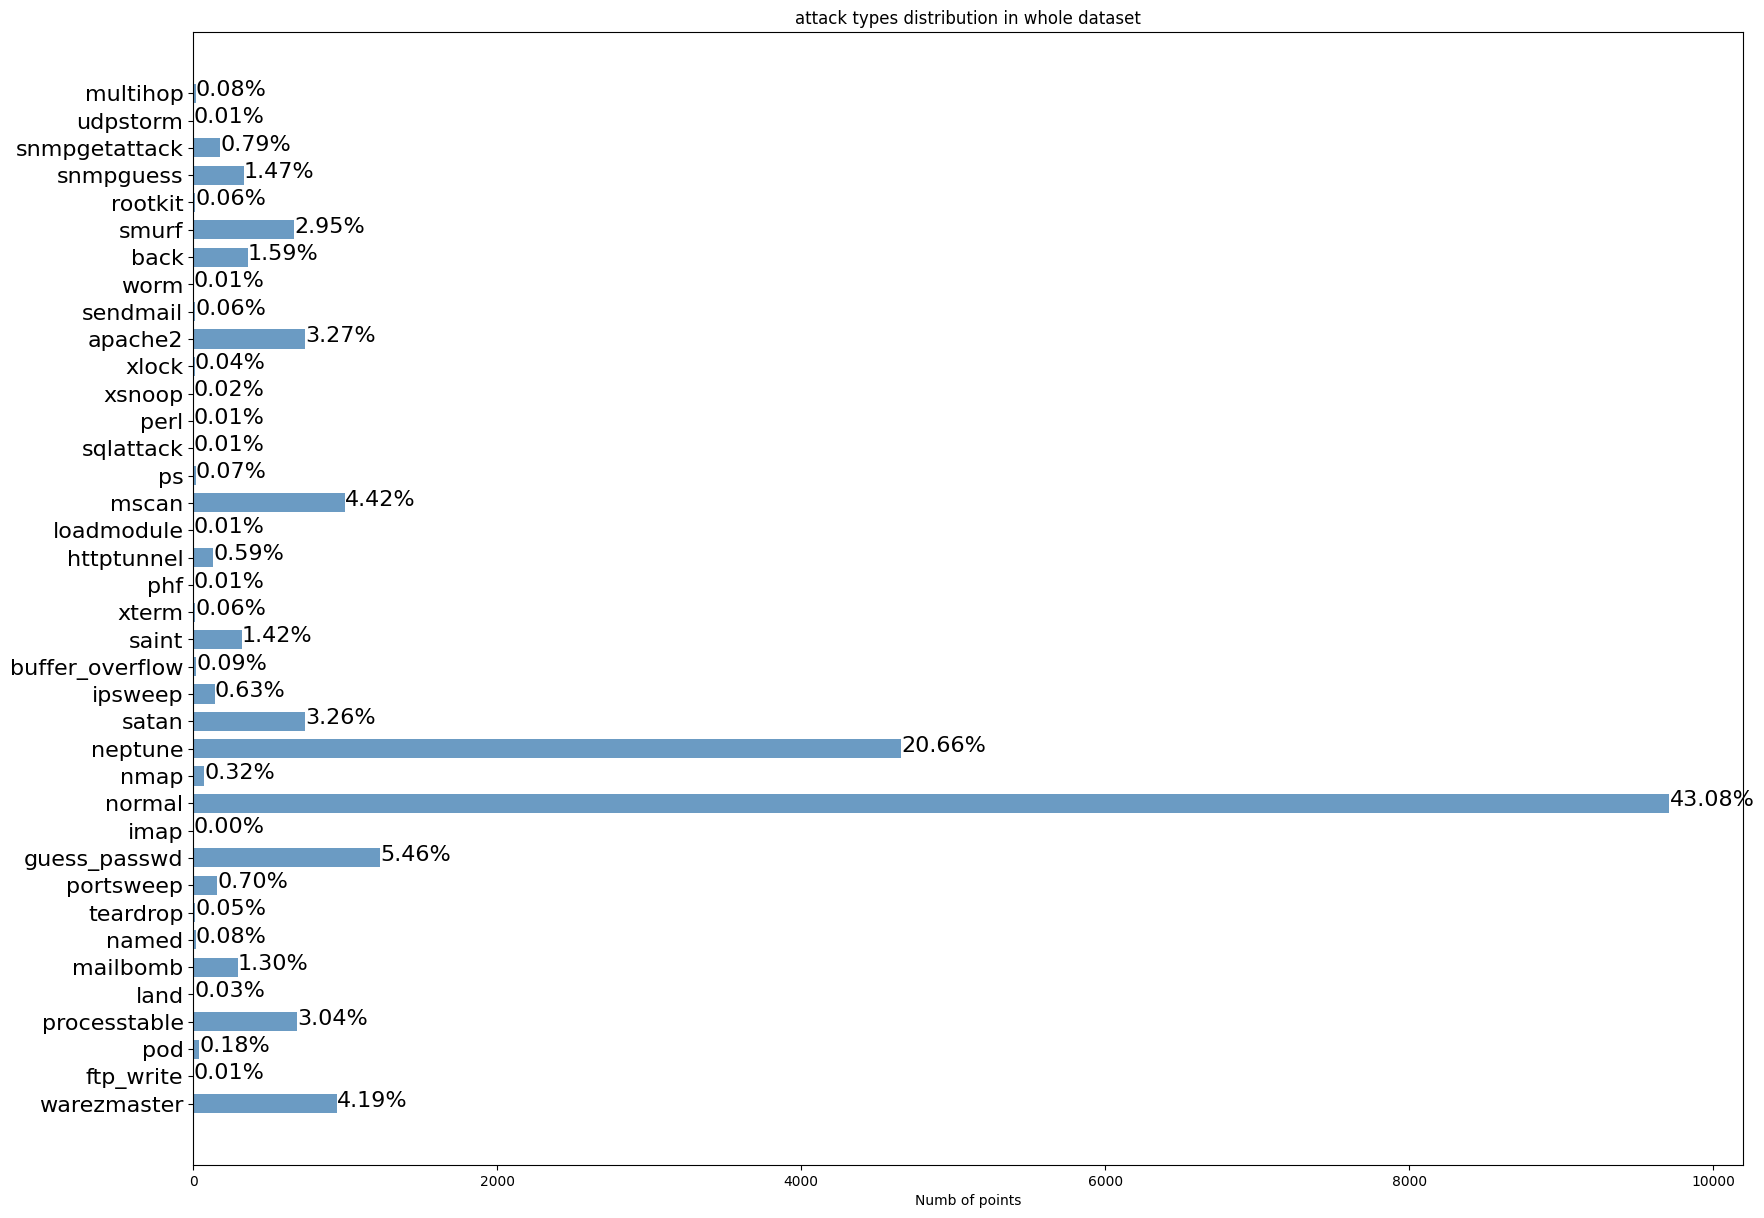

In [20]:

plt.barh(range(len(attack_type)), num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(attack_type)), attack_type, fontsize=16)
plt.xlabel("Numb of points")
plt.title("attack types distribution in whole dataset")
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100
for x, y in enumerate(num):
    plt.text(y+0.2, x-0.1, "{:.2%}".format(percent[x]), fontsize=16)
plt.show()

In [21]:
print("attack types distribution in attack dataset only")
num = []
percent = []
total = len(test_df) - len(test_df[test_df["attack"] == "normal"])
if 'normal' in attack_type:
    attack_type.remove('normal')
print("\nTotal abnormal points are {}".format(total))
for idx, attack in enumerate(attack_type):
    attack_num = len(test_df[test_df["attack"] == attack])
    num.append(attack_num)
    percent.append(attack_num/total)
print("attack type           Amount           Percentage")
for idx, attack in enumerate(attack_type):
    print("\n{:>15}          {}          {:.5%}".format(attack,num[idx],percent[idx]))

attack types distribution in attack dataset only

Total abnormal points are 12833
attack type           Amount           Percentage

    warezmaster          944          7.35604%

      ftp_write          3          0.02338%

            pod          41          0.31949%

   processtable          685          5.33780%

           land          7          0.05455%

       mailbomb          293          2.28318%

          named          17          0.13247%

       teardrop          12          0.09351%

      portsweep          157          1.22341%

   guess_passwd          1231          9.59246%

           imap          1          0.00779%

           nmap          73          0.56885%

        neptune          4657          36.28925%

          satan          735          5.72742%

        ipsweep          141          1.09873%

buffer_overflow          20          0.15585%

          saint          319          2.48578%

          xterm          13          0.10130%

            

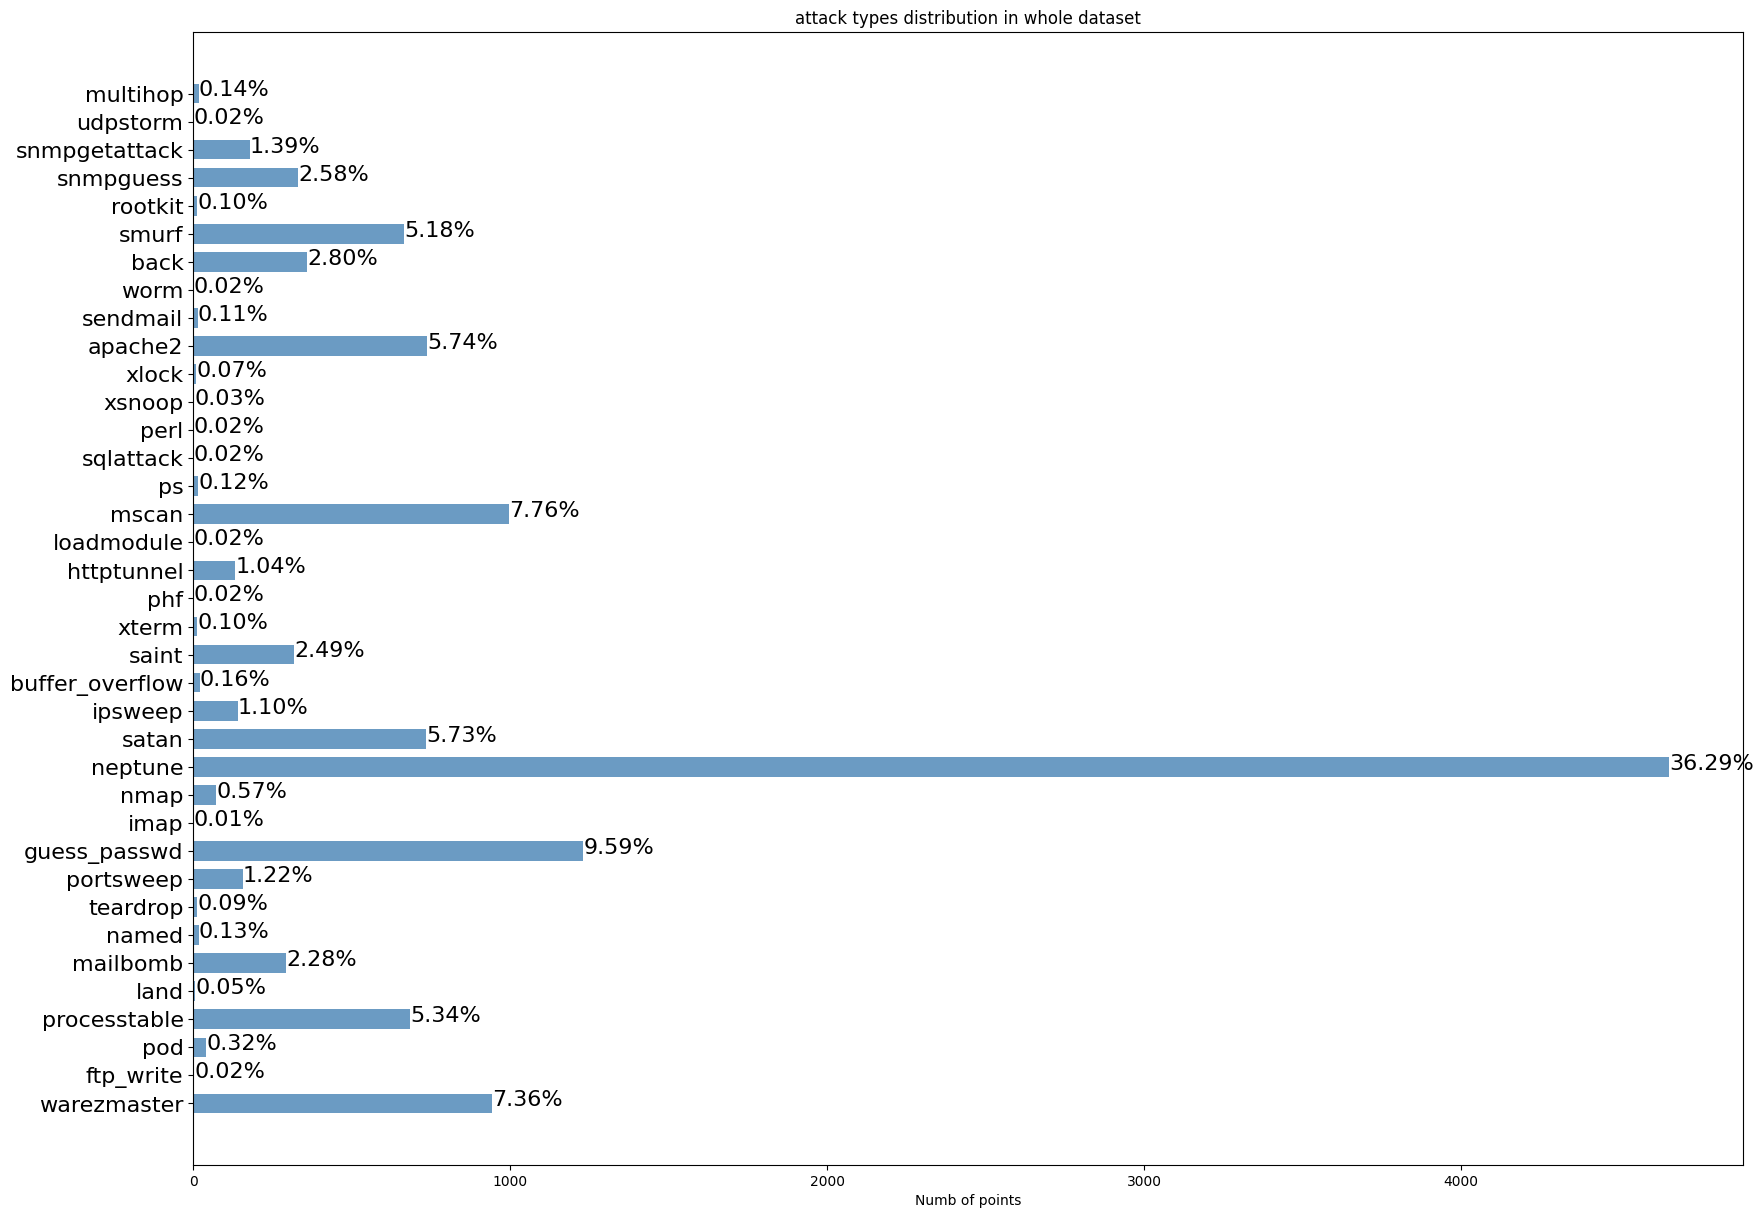

In [22]:
plt.barh(range(len(attack_type)), num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(attack_type)), attack_type, fontsize=16)
plt.xlabel("Numb of points")
plt.title("attack types distribution in whole dataset")
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100
for x, y in enumerate(num):
    plt.text(y+0.2, x-0.1, "{:.2%}".format(percent[x]), fontsize=16)
plt.show()